In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from ipywidgets import IntProgress

from code.bp import *
from code.mcmc import *
from code.lattice import *

%load_ext autoreload
%autoreload 2

# Detecting Phase Transitions

In [10]:
fprefix = 'mcmc_phase'

h, w = 50, 50

J = 0.5
B = 0 * np.zeros((h, w))

n_steps = 500

In [13]:
temperatures = np.arange(0.01, 4, 0.1)
energies = []
magnetizations = []

f = IntProgress(min=0, max=len(temperatures))
display.display(f)
for temperature in temperatures:
    lattice = create_spin_lattice(h, w)

    for i in range(n_steps):
        step_all(lattice, J, B, 1/temperature)
    
    magnetizations.append(magnetization(lattice))
    energies.append(energy(lattice, J, 1/temperature))
    
    f.value += 1

IntProgress(value=0, max=40)

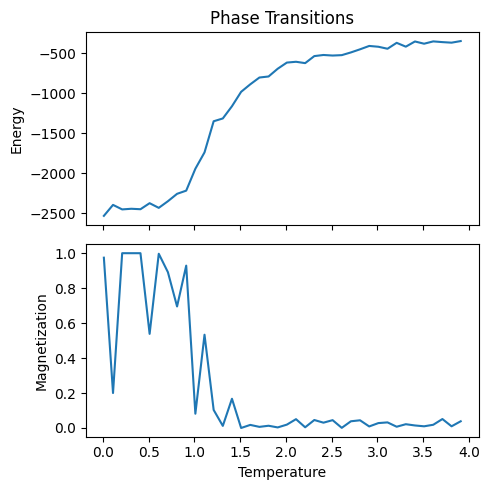

In [24]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(5, 5), sharex=True)

ax0.set_title('Phase Transitions')
ax0.plot(temperatures, energies)
ax0.set_ylabel('Energy')
ax1.plot(temperatures, [np.abs(m) for m in magnetizations])
ax1.set_ylabel('Magnetization')
ax1.set_xlabel('Temperature')
plt.tight_layout()
plt.savefig('graphics/mcmc_phase.png')

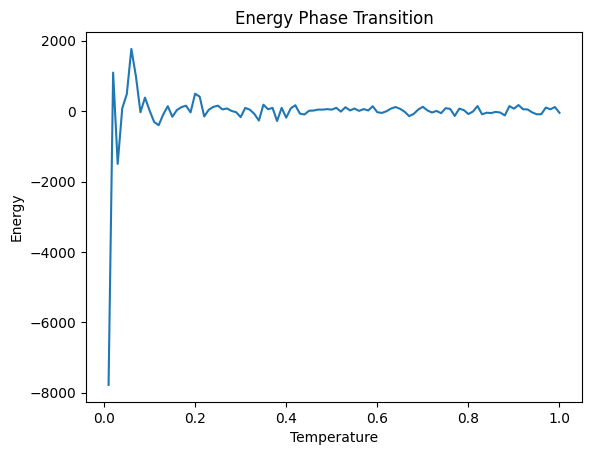

In [55]:
plt.plot(temperatures[:100], energies[:100])
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.title('Energy Phase Transition')
plt.savefig('graphics/mcmc_phase.png')